## Scikit Learn 함수: 데이터 분리
### train_test_split: 데이터셋 나누기

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

iris = load_iris()

iTest = 5
while True:
    # test data의 비율을 1 ~ 99 까지 바꿔가며 학습에 어떻게 영향을 주는지 파악한다.
    x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = iTest / 100)
    print("="*80)
    print("나눈 비율: ", iTest, "%")
    print("="*30, "train target", "="*30)
    y = pd.DataFrame(y_train)
    print(y.value_counts())
    print("="*30, "test target", "="*30)
    y = pd.DataFrame(y_test)
    print(y.value_counts())
    iTest = iTest + 5
    if(iTest > 60): break

나눈 비율:  5 %
============================== train target ==============================
0
1    49
0    47
2    46
Name: count, dtype: int64
============================== test target ==============================
0
2    4
0    3
1    1
Name: count, dtype: int64
나눈 비율:  10 %
============================== train target ==============================
0
2    46
0    45
1    44
Name: count, dtype: int64
============================== test target ==============================
0
1    6
0    5
2    4
Name: count, dtype: int64
나눈 비율:  15 %
============================== train target ==============================
0
2    45
0    44
1    38
Name: count, dtype: int64
============================== test target ==============================
0
1    12
0     6
2     5
Name: count, dtype: int64
나눈 비율:  20 %
============================== train target ==============================
0
1    45
2    40
0    35
Name: count, dtype: int64
============================== test target ==========================

#### train_test_split - random_set옵션: 데이터셋 고정하기

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
# 데이터프레임 만들기
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

print(df)

# train test set
# random_state값이 같으면 반복 실험을 해도 동일한 것이 나온다: 데이터셋 고정
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['target'],
                                                    stratify=df['target'], test_size=0.1, random_state=30)
print(x_test, "\n", y_test)
print("------------------------")
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['target'],
                                                    stratify=df['target'], test_size=0.1, random_state=30)
print(x_test)
print("------------------------")
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['target'],
                                                    stratify=df['target'], test_size=0.1, random_state=20)
print(x_test)
print("------------------------")
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :4], df['target'],
                                                    stratify=df['target'], test_size=0.1, random_state=10)
print(x_test)
print("------------------------")

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

### 잘못된 train_test_split: 제대로 되지 않는 학습의 예

In [10]:
# 학습셋과 테스트셋을 섞은 경우 / 섞지 않은 경우의 학습 모델을 비교

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
iris = load_iris()

## 균등 분할하지 않은 경우
x_train = df.iloc[:120, :-1]
x_test  = df.iloc[120:, :-1]
y_train = df.iloc[:120, -1:]
y_test  = df.iloc[120:, -1:]

model = LinearRegression().fit(x_train, y_train)
print("제대로 섞지 않은 데이터 사용===========================")
print("학습셋 스코어: ", model.score(x_train, y_train), "테스트셋 스코어: ", model.score(x_test, y_test))

## 데이터를 섞어서 사용하는 경우 - 1
df_shuffled = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)
x_train = df_shuffled.iloc[:120, :-1]
x_test  = df_shuffled.iloc[120:, :-1]
y_train = df_shuffled.iloc[:120, -1:]
y_test  = df_shuffled.iloc[120:, -1:]

model = LinearRegression().fit(x_train, y_train)
print("제대로 섞은 데이터(수동) 사용===========================")
print("학습셋 스코어: ", model.score(x_train, y_train), "테스트셋 스코어: ", model.score(x_test, y_test))

## 데이터를 섞어서 사용하는 경우 - 2
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.20)
model = LinearRegression().fit(x_train, y_train)
print("제대로 섞은 데이터(train_test_split) 사용===========================")
print("학습셋 스코어: ", model.score(x_train, y_train), "테스트셋 스코어: ", model.score(x_test, y_test))


제대로 섞지 않은 데이터 사용===========================
학습셋 스코어:  0.9332589750027435 테스트셋 스코어:  0.0
제대로 섞은 데이터(수동) 사용===========================
학습셋 스코어:  0.9369993396039553 테스트셋 스코어:  0.9008110829571025
제대로 섞은 데이터(train_test_split) 사용===========================
학습셋 스코어:  0.931926734594088 테스트셋 스코어:  0.9212024357646437


## 모델 평가: score, predict 함수
**학습이 잘 된 모델은 train-set이나 test-set 모두 높은 정확도를 보인다.**

In [8]:
# iris 데이터 train. 
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

iris = load_iris()
##
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.20)
model = LinearRegression().fit(x_train, y_train)
##
print("학습셋 스코어: ", model.score(x_train, y_train), "테스트셋 트코어: ", model.score(x_test, y_test))
# target 값: 0, 1, 2
y_preds = model.predict(x_test)
y_preds = y_preds.round().astype(int) # 반올림하여 가까운 값으로 접근
print("실제: ", y_test)
print("예측: ", y_preds)

학습셋 스코어:  0.9301522849441501 테스트셋 트코어:  0.9244232713349552
실제:  [1 2 2 1 2 2 2 2 0 0 2 2 2 0 1 2 1 1 1 1 1 1 0 1 0 1 1 1 0 2]
예측:  [1 2 2 1 2 2 2 2 0 0 1 2 2 0 1 2 1 1 1 1 1 1 0 1 0 1 1 1 0 2]


## 결과 시각화
### Iris

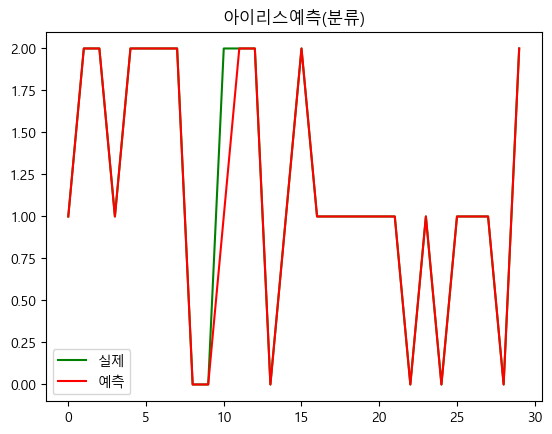

In [9]:
y_preds = model.predict(x_test)
y_preds = y_preds.round().astype(int)  # 반올림하여 가까운 값으로

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plt.title('아이리스예측(분류)')
plt.plot(y_test, 'g', label = '실제')
plt.plot(y_preds, 'r', label = '예측')
plt.legend()
plt.show()

### Diabetes

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 442개 데이터
diabetes = load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2)
## 모델 정의
model = LinearRegression().fit(x_train, y_train)
y_preds = model.predict(x_test)
r2_score = r2_score(y_test, y_preds)
mean_squared_error = mean_squared_error(y_test, y_preds)
mean_absolute_error = mean_absolute_error(y_test, y_preds)
print("LinearRegression r2_score: ", r2_score)
print("LinearRegression MSE: ", mean_squared_error)
print("LinearRegression MAE: ", mean_absolute_error)
print("LinearRegression score: ", model.score(x_test, y_test))

LinearRegression r2_score:  0.48058391964303815
LinearRegression MSE:  3103.6624917891463
LinearRegression MAE:  46.60632717269662
LinearRegression score:  0.48058391964303815


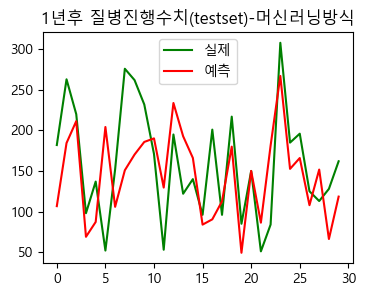

In [79]:
y_predict = model.predict(x_test[:30, :]) # 예측
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plt.title('1년후 질병진행수치(testset)-머신러닝방식')

plt.plot(y_test[:30], 'g', label='실제')
plt.plot(y_predict, 'r', label='예측')

plt.legend()
plt.show()

### Breast Cancer

train score:  0.9577464788732394
test score:  0.965034965034965


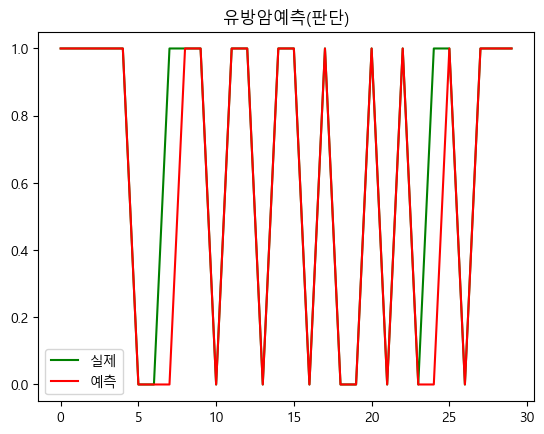

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=66)
model = LogisticRegression(max_iter=10000)
model.fit(x_train, y_train)
# 유방암인지 아닌지 판단
y_preds = model.predict(x_test)
print("train score: ", model.score(x_train, y_train))
print("test score: ", model.score(x_test, y_test))

###
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plt.title('유방암예측(판단)')
plt.plot(y_test[:30], 'g', label = '실제')
plt.plot(y_preds[:30], 'r', label = '예측')
plt.legend()
plt.show()

## 데이터 전처리 더 살펴보기
1) 데이터 전처리 방법
- 데이터 청소(Data cleaning): 데이터 수집 과정에서 생긴 오류나 잡음을 제거
- 데이터 편집(Data editing): 데이터에 포함된 불완전 정보를 교정
- 데이터 라벨링(Data labeling):데이터마다 분석에 필요한 태그를 붙임
- 데이터 정리(Data reduction): 군더더기 데이터를 줄임
- 데이터 재구성(Data wrangling):데이터를 분석하게 좋게 변환

2) 데이터 전처리 분류
- 기계적 데이터 전 처리
     - 단순한 작업으로 데이터 전 처리하는 방법 : 데이터 청소, 데이터 편집, 데이터 라벨링
- 의미적 데이터 전 처리
    - 데이터의 의미를 분석하여 데이터를 전 처리:  데이터 정리, 데이터 재구성

3) 데이터 전처리의 필요성
- AI를 학습시키기 위한 데이터를 사전정제 하여 높은 수준의 학습 데이터를 만들어야 함
- 모델을 학습시키는 데이터의 품질에 따라 학습된 모델의 성능이 좌우
- 모델을 학습시키는 노력보다, 데이터를 수집하고 전 처리하는 노력이 더 요구

### 다이아몬드 데이터
#### 데이터 전처리

In [38]:
import pandas as pd
csv_dia = pd.read_csv('./data/diamonds.csv')
print(csv_dia)  # csv 파일을 읽어 판다스 dataframe에 넣음

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
49995   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[50000 rows x 10 columns]


In [39]:
# 중복 행 제거
csv_dia = csv_dia.drop_duplicates()
print(csv_dia)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
49995   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[49874 rows x 10 columns]


In [40]:
# 무의미한 항목을 정제: x, y, z필드: 너무 작은 크기 제외
csv_dia = csv_dia.loc[~(((csv_dia['x'] <= 0) | (csv_dia['y'] <= 0)) | (csv_dia['z'] <= 0))]
print(csv_dia)
csv_dia = csv_dia.loc[~(((csv_dia['x'] > 30) | (csv_dia['z'] > 30)) | (csv_dia['table'] > 94))]
print(csv_dia)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
49995   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[49857 rows x 10 columns]
       carat        cut color clarity  depth  tab

In [41]:
# x,yz 필드는 가로*세로*높이를 곱해 부피필드로 사용
csv_dia['xyz'] = csv_dia['x']*csv_dia['y']*csv_dia['z']
csv_dia.drop(columns=['x', 'y', 'z'], axis=1, inplace=True)
print(csv_dia)

       carat        cut color clarity  depth  table  price         xyz
0       0.23      Ideal     E     SI2   61.5   55.0    326   38.202030
1       0.21    Premium     E     SI1   59.8   61.0    326   34.505856
2       0.23       Good     E     VS1   56.9   65.0    327   38.076885
3       0.29    Premium     I     VS2   62.4   58.0    334   46.724580
4       0.31       Good     J     SI2   63.3   58.0    335   51.917250
...      ...        ...   ...     ...    ...    ...    ...         ...
49995   0.72      Ideal     D     SI1   60.8   57.0   2757  115.920000
49996   0.72       Good     D     SI1   63.1   55.0   2757  118.110175
49997   0.70  Very Good     D     SI1   62.8   60.0   2757  114.449728
49998   0.86    Premium     H     SI2   61.0   58.0   2757  140.766120
49999   0.75      Ideal     D     SI2   62.2   55.0   2757  124.568444

[49855 rows x 8 columns]


In [42]:
# 요소와 타겟으로 분리
dia_target = csv_dia.pop('price') # target: 금액
dia_features = csv_dia.copy() # features: 금액 뺀 나머지

print(dia_features)
print(dia_target)

       carat        cut color clarity  depth  table         xyz
0       0.23      Ideal     E     SI2   61.5   55.0   38.202030
1       0.21    Premium     E     SI1   59.8   61.0   34.505856
2       0.23       Good     E     VS1   56.9   65.0   38.076885
3       0.29    Premium     I     VS2   62.4   58.0   46.724580
4       0.31       Good     J     SI2   63.3   58.0   51.917250
...      ...        ...   ...     ...    ...    ...         ...
49995   0.72      Ideal     D     SI1   60.8   57.0  115.920000
49996   0.72       Good     D     SI1   63.1   55.0  118.110175
49997   0.70  Very Good     D     SI1   62.8   60.0  114.449728
49998   0.86    Premium     H     SI2   61.0   58.0  140.766120
49999   0.75      Ideal     D     SI2   62.2   55.0  124.568444

[49855 rows x 7 columns]
0         326
1         326
2         327
3         334
4         335
         ... 
49995    2757
49996    2757
49997    2757
49998    2757
49999    2757
Name: price, Length: 49855, dtype: int64


In [43]:
# 데이터셋 확인해보기: feature(cut, color, clarity)에 어떤 데이터가 있는 지확인해본다.
print(dia_features.cut.unique())
print(dia_features.color.unique())
print(dia_features.clarity.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [44]:
# 라벨링: 매핑, 각 속성에 점수를 매겨 수치화
map1 = { 'Ideal': 4, 'Premium':3, 'Good': 2, 'Very Good': 1, 'Fair':0 }
map2 = { "D": 6, "E": 5, "F": 4, "G": 3, "H": 2, "I": 1, "J": 0 }
map3 = { "I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7 }
dia_features.cut = dia_features.cut.map(map1)
dia_features.color = dia_features.color.map(map2)
dia_features.clarity = dia_features.clarity.map(map3)

print(dia_features)
print(dia_target)

       carat  cut  color  clarity  depth  table         xyz
0       0.23    4      5        1   61.5   55.0   38.202030
1       0.21    3      5        2   59.8   61.0   34.505856
2       0.23    2      5        4   56.9   65.0   38.076885
3       0.29    3      1        3   62.4   58.0   46.724580
4       0.31    2      0        1   63.3   58.0   51.917250
...      ...  ...    ...      ...    ...    ...         ...
49995   0.72    4      6        2   60.8   57.0  115.920000
49996   0.72    2      6        2   63.1   55.0  118.110175
49997   0.70    1      6        2   62.8   60.0  114.449728
49998   0.86    3      2        1   61.0   58.0  140.766120
49999   0.75    4      6        1   62.2   55.0  124.568444

[49855 rows x 7 columns]
0         326
1         326
2         327
3         334
4         335
         ... 
49995    2757
49996    2757
49997    2757
49998    2757
49999    2757
Name: price, Length: 49855, dtype: int64


#### 다이아몬드 값 예측

In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

X = dia_features.to_numpy()
Y = dia_target.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=100, test_size=0.1)

# 모델을 준비하고 모델을 학습시킴: 선형회귀
LR = LinearRegression(fit_intercept=True).fit(x_train, y_train)
# 성능 측정: r2_score
y_preds = LR.predict(x_test)
r2_score = r2_score(y_test, y_preds)
mean_squared_error = mean_squared_error(y_test, y_preds)
mean_absolute_error = mean_absolute_error(y_test, y_preds)
print("LinearRegression r2_score: ", r2_score)
print("LinearRegression mean_squared_error: ", mean_squared_error)
print("LinearRegression mean_absolute_error: ", mean_absolute_error)

LinearRegression r2_score:  0.9051618487155848
LinearRegression mean_squared_error:  1490088.0186501516
LinearRegression mean_absolute_error:  851.156281617271


In [46]:
# 테스트셋과 트레인셋 조절로 좋은 학습모델 찾은 코드: 참고할만 함
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
model = LinearRegression()
test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]

best_test_size = None
best_random_state = None
best_r2_score = -float('inf')
for test_size in test_sizes:
    for random_state in random_states:
        x_train, x_test, y_train, y_test = train_test_split(dia_features, dia_target,
                                                             random_state=random_state, test_size=test_size)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_test_size = test_size
            best_random_state = random_state

print(f"Best test size: {best_test_size}")
print(f"Best random state: {best_random_state}")
print(f"Best R2 score: {best_r2_score}")

Best test size: 0.1
Best random state: 42
Best R2 score: 0.911435878189204


### 노트북 데이터 전처리

In [1]:
import pandas as pd
df_cleaned = pd.read_csv("./data/notebook/cleaned.csv")
print(df_cleaned)

       Brand                                Product_Description  Screen_Size  \
0     Lenovo  Lenovo ThinkPad 14” HD Laptop PC Computer Core...         14.0   
1       Dell  Dell Latitude 15.6" Laptop Intel Core i5 64GB ...         15.6   
2         HP  NEW HP 15 Laptop. 15.6" 1080p, i5-1135G7, 8GB ...         15.6   
3     Lenovo  2024 Lenovo Ideapad Laptop 15 FHD Touch Intel ...         15.6   
4     Lenovo  2024 Lenovo Ideapad Laptop 15.6" FHD Touch Int...         15.6   
...      ...                                                ...          ...   
2947    Dell  Dell Latitude 7320 i5-1145G7 8GB 256GB BT5 WiF...         13.3   
2948     MSI  NEW MSI COMPUTER Sword 15 A12UC-295 Sword15122...         15.6   
2949    Dell  Dell Precision 5550 Workstation 15 15.6 Laptop...         15.6   
2950      HP  HP 15 Laptop 15.6" FHD i5-1135G7 8GB RAM 256GB...         15.6   
2951      HP  3 PCS Karlash 6 Column Undated Appointment Boo...         14.0   

     RAM                Processor      

In [2]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                2952 non-null   object 
 1   Product_Description  2952 non-null   object 
 2   Screen_Size          2952 non-null   float64
 3   RAM                  2952 non-null   object 
 4   Processor            2952 non-null   object 
 5   GPU                  2604 non-null   object 
 6   GPU_Type             2718 non-null   object 
 7   Resolution           2565 non-null   object 
 8   Condition            2952 non-null   object 
 9   Price                2952 non-null   float64
dtypes: float64(2), object(8)
memory usage: 230.8+ KB
None


In [3]:
df_cleaned = df_cleaned.drop(columns=['Brand', 'Product_Description'])
print(df_cleaned)

      Screen_Size RAM                Processor                      GPU  \
0            14.0  16   Intel Core i5 7th Gen.    Intel HD Graphics 520   
1            15.6  64   Intel Core i5 8th Gen.   Intel UHD Graphics 620   
2            15.6   8  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
3            15.6  Up  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
4            15.6  16  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
...           ...  ..                      ...                      ...   
2947         13.3   8  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
2948         15.6   8  Intel Core i5 12th Gen.  NVIDIA GeForce RTX 3050   
2949         15.6   8  Intel Core i5 10th Gen.        Intel HD Graphics   
2950         15.6   8  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
2951         14.0   8   Intel Core i5 6th Gen.    Intel HD Graphics 520   

                          GPU_Type   Resolution                Condition  \
0     Integrated/On-Boa

#### RAM: 숫자가 아닌 데이터를 제거

In [4]:
# up --> 64 and try int
df_cleaned['RAM'] = df_cleaned['RAM'].replace('Up', '64')
# df_cleaned
df_cleaned['RAM'] = pd.to_numeric(df_cleaned['RAM'], errors = 'coerce').fillna(0).astype(int)
print(df_cleaned)

      Screen_Size  RAM                Processor                      GPU  \
0            14.0   16   Intel Core i5 7th Gen.    Intel HD Graphics 520   
1            15.6   64   Intel Core i5 8th Gen.   Intel UHD Graphics 620   
2            15.6    8  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
3            15.6   64  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
4            15.6   16  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
...           ...  ...                      ...                      ...   
2947         13.3    8  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
2948         15.6    8  Intel Core i5 12th Gen.  NVIDIA GeForce RTX 3050   
2949         15.6    8  Intel Core i5 10th Gen.        Intel HD Graphics   
2950         15.6    8  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
2951         14.0    8   Intel Core i5 6th Gen.    Intel HD Graphics 520   

                          GPU_Type   Resolution                Condition  \
0     Integ

#### Processor: intel을 기준으로 칩 시리즈와 세대를 나타내는 숫자를 추출

In [12]:
import re
def processor_to_int(processor):
    match = re.search(r'i(\d)\s*(\d+)?\s*', processor)
    # 정규 표현식: i 다음 숫자 한자리: i(\d) / 빈칸 한자리 이상: \s* / 그 다음 숫자 한자리 이상: (\d+) / 공백있을수도: ?\s*

    if match:
        core_type = match.group(1)
        gen = match.group(2)
        code = int(core_type + gen)
        code if code >= 100 else int(core_type + '0' + gen)
        print(processor, "==>", code)
        return code
    else:
        print(processor, "==>", 0)
        return 0

df_cleaned['Processor_Int'] = df_cleaned['Processor'].apply(processor_to_int)
print(df_cleaned)

Intel Core i5 7th Gen. ==> 57
Intel Core i5 8th Gen. ==> 58
Intel Core i5 11th Gen. ==> 511
Intel Core i5 11th Gen. ==> 511
Intel Core i5 11th Gen. ==> 511
Intel Core i5 12th Gen. ==> 512
Intel Core i7 13th Gen. ==> 713
Intel Core i5 7th Gen. ==> 57
Intel Core i5 8th Gen. ==> 58
Intel Core i5 6th Gen. ==> 56
Intel Core i7 7th Gen. ==> 77
Intel Core i5 13th Gen. ==> 513
Intel Core i5 13th Gen. ==> 513
Intel Core i7 12th Gen. ==> 712
Intel Core i7 11th Gen. ==> 711
Intel Core i5 6th Gen. ==> 56
Intel Core i5 11th Gen. ==> 511
Intel Core i7 13th Gen. ==> 713
Intel Core i5 8th Gen. ==> 58
Intel Core i5 8th Gen. ==> 58
Intel Core i5 6th Gen. ==> 56
Intel Core i7 8th Gen. ==> 78
Intel Core i7 12th Gen. ==> 712
Intel Core i5 12th Gen. ==> 512
Intel Core i7 8th Gen. ==> 78
Intel Core i5 8th Gen. ==> 58
Intel Core i5 5th Gen. ==> 55
Intel Core i5 12th Gen. ==> 512
Intel Core i7 8th Gen. ==> 78
Intel Core i5 8th Gen. ==> 58
Intel Core i7 8th Gen. ==> 78
Intel Core i5 10th Gen. ==> 510
Intel Core

#### 해상도: 숫자를 추출해 총 픽셀수로 변환

In [13]:
import re
# Fill the missing values in the Resolution column with the most frequently use value
# 값이 없는 결측치는 NaN으로 채운다.

most_common_resolution = df_cleaned['Resolution'].mode()[0]
df_cleaned['Resolution'] = df_cleaned['Resolution'].fillna(most_common_resolution)

def resolution_to_int(resolution):
    # 이전 정규표현식과 비슷
    match = re.match(r'(\d+)\s*x\s*(\d+)', resolution)
    if match:
        width = int(match.group(1))
        height = int(match.group(2))
        return width * height
    return 0

df_cleaned['Resolution_Int'] = df_cleaned['Resolution'].apply(resolution_to_int)
print(df_cleaned)

      Screen_Size  RAM                Processor                      GPU  \
0            14.0   16   Intel Core i5 7th Gen.    Intel HD Graphics 520   
1            15.6   64   Intel Core i5 8th Gen.   Intel UHD Graphics 620   
2            15.6    8  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
3            15.6   64  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
4            15.6   16  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
...           ...  ...                      ...                      ...   
2947         13.3    8  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
2948         15.6    8  Intel Core i5 12th Gen.  NVIDIA GeForce RTX 3050   
2949         15.6    8  Intel Core i5 10th Gen.        Intel HD Graphics   
2950         15.6    8  Intel Core i5 11th Gen.   Intel Iris Xe Graphics   
2951         14.0    8   Intel Core i5 6th Gen.    Intel HD Graphics 520   

                          GPU_Type   Resolution                Condition  \
0     Integ

In [14]:
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Screen_Size     2952 non-null   float64
 1   RAM             2952 non-null   int32  
 2   Processor       2952 non-null   object 
 3   GPU             2604 non-null   object 
 4   GPU_Type        2718 non-null   object 
 5   Resolution      2952 non-null   object 
 6   Condition       2952 non-null   object 
 7   Price           2952 non-null   float64
 8   Processor_Int   2952 non-null   int64  
 9   Resolution_Int  2952 non-null   int64  
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 219.2+ KB
None


In [15]:
df_cleaned2 = df_cleaned.drop(columns=['Resolution', 'Processor'])
print(df_cleaned2)

      Screen_Size  RAM                      GPU                      GPU_Type  \
0            14.0   16    Intel HD Graphics 520  Integrated/On-Board Graphics   
1            15.6   64   Intel UHD Graphics 620  Integrated/On-Board Graphics   
2            15.6    8   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
3            15.6   64   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
4            15.6   16   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
...           ...  ...                      ...                           ...   
2947         13.3    8   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
2948         15.6    8  NVIDIA GeForce RTX 3050            Dedicated Graphics   
2949         15.6    8        Intel HD Graphics  Integrated/On-Board Graphics   
2950         15.6    8   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
2951         14.0    8    Intel HD Graphics 520  Integrated/On-Board Graphics   

                    Conditi

In [16]:
print(df_cleaned2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Screen_Size     2952 non-null   float64
 1   RAM             2952 non-null   int32  
 2   GPU             2604 non-null   object 
 3   GPU_Type        2718 non-null   object 
 4   Condition       2952 non-null   object 
 5   Price           2952 non-null   float64
 6   Processor_Int   2952 non-null   int64  
 7   Resolution_Int  2952 non-null   int64  
dtypes: float64(2), int32(1), int64(2), object(3)
memory usage: 173.1+ KB
None


#### 상태: 여려 Condition을 나타내는 필드를 생성하여 boolean형태로 추출

In [17]:
df_cleaned2['Condition'].unique()
df_cleaned2 = pd.get_dummies(df_cleaned2, columns=['Condition'], prefix=['Condition'])
print(df_cleaned2)

      Screen_Size  RAM                      GPU                      GPU_Type  \
0            14.0   16    Intel HD Graphics 520  Integrated/On-Board Graphics   
1            15.6   64   Intel UHD Graphics 620  Integrated/On-Board Graphics   
2            15.6    8   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
3            15.6   64   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
4            15.6   16   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
...           ...  ...                      ...                           ...   
2947         13.3    8   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
2948         15.6    8  NVIDIA GeForce RTX 3050            Dedicated Graphics   
2949         15.6    8        Intel HD Graphics  Integrated/On-Board Graphics   
2950         15.6    8   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
2951         14.0    8    Intel HD Graphics 520  Integrated/On-Board Graphics   

       Price  Processor_Int

#### Label Encoder 사용하여 GPU, GPU Type 레이블링

In [26]:
# GPU와 GPU_Type 필드를 레이블링한다.
from sklearn.preprocessing import LabelEncoder
print(df_cleaned2['GPU'].unique())
print(df_cleaned2['GPU_Type'].unique())
# Label Encoding 
label_encoder_gpu = LabelEncoder()
label_encoder_gpu_type = LabelEncoder()

df_cleaned2['GPU_Label'] = label_encoder_gpu.fit_transform(df_cleaned2['GPU'])
df_cleaned2['GPU_Type_Label'] = label_encoder_gpu_type.fit_transform(df_cleaned2['GPU_Type'])

['Intel HD Graphics 520' 'Intel UHD Graphics 620' 'Intel Iris Xe Graphics'
 'Intel HD Graphics 620' 'Intel HD Graphics' 'NVIDIA Quadro M2200'
 'NVIDIA GeForce RTX 3050' nan 'NVIDIA GeForce GTX 1070'
 'Intel UHD Graphics' 'NVIDIA GeForce RTX 3060'
 'NVIDIA GeForce RTX 3050 Ti' 'NVIDIA GeForce RTX 2050'
 'Intel UHD Graphics 630' 'AMD Radeon Graphics' 'Intel Iris Graphics'
 'Intel HD 520' 'Intel HD Graphics 615' 'NVIDIA GeForce RTX 4050'
 'Intel Iris Plus Graphics G7' 'NVIDIA GeForce GTX 1650'
 'NVIDIA RTX A1000' 'NVIDIA Quadro T2000' 'NVIDIA GeForce GTX 1660 Ti'
 'Intel HD Graphics 630' 'NVIDIA Quadro P500' 'Intel Iris Plus Graphics.'
 'Integrated' 'Intel(R) HD Graphics 620' 'Intel® Iris XE'
 'Intel Iris Xe Graphic' 'INVIDIA RTX A1000' 'Intel® HD Graphics'
 'NVIDIA Quadro M500M' 'Skylake GT2 [HD Graphics 520]'
 'NVIDIA GeForce GTX 1650 Ti Max-Q' 'NVIDIA GeForce MX550'
 'AMD Radeon Pro W5500M' 'Integrated Intel UHD Graphics'
 'Intel UHD Graphics 615' 'NVIDIA GeForce MX150'
 'NVIDIA GeForc

In [27]:
print(df_cleaned2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Screen_Size                        2952 non-null   float64
 1   RAM                                2952 non-null   int32  
 2   GPU                                2604 non-null   object 
 3   GPU_Type                           2718 non-null   object 
 4   Price                              2952 non-null   float64
 5   Processor_Int                      2952 non-null   int64  
 6   Resolution_Int                     2952 non-null   int64  
 7   Condition_Excellent - Refurbished  2952 non-null   bool   
 8   Condition_Good - Refurbished       2952 non-null   bool   
 9   Condition_New                      2952 non-null   bool   
 10  Condition_Open box                 2952 non-null   bool   
 11  Condition_Very Good - Refurbished  2952 non-null   bool 

In [28]:
print(df_cleaned2)

      Screen_Size  RAM                      GPU                      GPU_Type  \
0            14.0   16    Intel HD Graphics 520  Integrated/On-Board Graphics   
1            15.6   64   Intel UHD Graphics 620  Integrated/On-Board Graphics   
2            15.6    8   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
3            15.6   64   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
4            15.6   16   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
...           ...  ...                      ...                           ...   
2947         13.3    8   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
2948         15.6    8  NVIDIA GeForce RTX 3050            Dedicated Graphics   
2949         15.6    8        Intel HD Graphics  Integrated/On-Board Graphics   
2950         15.6    8   Intel Iris Xe Graphics  Integrated/On-Board Graphics   
2951         14.0    8    Intel HD Graphics 520  Integrated/On-Board Graphics   

       Price  Processor_Int

In [29]:
df_cleaned2 = df_cleaned2.drop(columns=['GPU', 'GPU_Type'])
print(df_cleaned2)

      Screen_Size  RAM   Price  Processor_Int  Resolution_Int  \
0            14.0   16  189.99             57         2073600   
1            15.6   64  349.99             58         2073600   
2            15.6    8  369.95            511         2073600   
3            15.6   64  459.00            511         2073600   
4            15.6   16  499.00            511         2073600   
...           ...  ...     ...            ...             ...   
2947         13.3    8  789.99            511         2073600   
2948         15.6    8  895.55            512         2073600   
2949         15.6    8  635.65            510         2304000   
2950         15.6    8  405.99            511         2073600   
2951         14.0    8   17.50             56         2073600   

      Condition_Excellent - Refurbished  Condition_Good - Refurbished  \
0                                 False                         False   
1                                 False                         False   


In [31]:
print(df_cleaned2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Screen_Size                        2952 non-null   float64
 1   RAM                                2952 non-null   int32  
 2   Price                              2952 non-null   float64
 3   Processor_Int                      2952 non-null   int64  
 4   Resolution_Int                     2952 non-null   int64  
 5   Condition_Excellent - Refurbished  2952 non-null   bool   
 6   Condition_Good - Refurbished       2952 non-null   bool   
 7   Condition_New                      2952 non-null   bool   
 8   Condition_Open box                 2952 non-null   bool   
 9   Condition_Very Good - Refurbished  2952 non-null   bool   
 10  GPU_Label                          2952 non-null   int32  
 11  GPU_Type_Label                     2952 non-null   int32

#### 모델 학습시키기

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_cleaned2.drop(columns=['Price'])
Y = df_cleaned2['Price']

# train tets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=11)

model = LinearRegression()
# model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

s=model.score(x_test, y_test)
print("score=", s)
y_pred = model.predict(x_train)

mse_s = mean_squared_error(y_train, y_pred)
print("Mean Sqaure Error: ", mse_s)

r2_s = r2_score(y_train, y_pred)
print("R2 Score: ", r2_s)

score= 0.3135864481761699
Mean Sqaure Error:  35675.69996595703
R2 Score:  0.3497278410609851


## 노트북 2023 문제

In [72]:
# 필요한 라이브러리 임폴트 #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("./data/laptop_data_cleaned.csv")
print(df)

     Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand   

In [74]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB
None


### Company 버림

In [75]:
df.drop(columns = ['Company'], inplace = True)

print(df)

                TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0              Ultrabook    8    1.37  11.175755            0    1   
1              Ultrabook    8    1.34  10.776777            0    0   
2               Notebook    8    1.86  10.329931            0    0   
3              Ultrabook   16    1.83  11.814476            0    1   
4              Ultrabook    8    1.37  11.473101            0    1   
...                  ...  ...     ...        ...          ...  ...   
1268            Notebook    4    2.20  10.555257            0    0   
1269  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271            Notebook    2    1.50   9.409283            0    0   
1272            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand       Os  
0     226.983005          Intel Core i5     0  128     Intel      Mac  
1     127.67794

### TypeName 속성 버림

In [45]:
df.drop(columns = ['TypeName'], inplace = True)

print(df)

      Ram  Weight      Price  TouchScreen  Ips         Ppi  \
0       8    1.37  11.175755            0    1  226.983005   
1       8    1.34  10.776777            0    0  127.677940   
2       8    1.86  10.329931            0    0  141.211998   
3      16    1.83  11.814476            0    1  220.534624   
4       8    1.37  11.473101            0    1  226.983005   
...   ...     ...        ...          ...  ...         ...   
1268    4    2.20  10.555257            0    0  100.454670   
1269    4    1.80  10.433899            1    1  157.350512   
1270   16    1.30  11.288115            1    1  276.053530   
1271    2    1.50   9.409283            0    0  111.935204   
1272    6    2.19  10.614129            0    0  100.454670   

                  Cpu_brand   HDD  SSD Gpu_brand       Os  
0             Intel Core i5     0  128     Intel      Mac  
1             Intel Core i5     0    0     Intel      Mac  
2             Intel Core i5     0  256     Intel   Others  
3             I

###  이상치 제거하기: IQR
사분위수를 이용하여 지나치게 외떨어진 데이터들을 제거하는 기법. IQR: 제3사분위수(Q3)와 제1사분위수(Q1)의 차이. IQR = Q3 - Q1
- 데이터를 오름차순으로 정렬
- 중앙값(Q2)을 찾아 데이터를 두 부분으로 나눈다.
- Q1은 아래쪽 절반의 중앙값, Q3는 위쪽 절반의 중앙값.
- IQR = Q3 - Q1을 계산한다.
이상치는 Q1 - 1.5 * IQR 와 Q3 + 1.5 * IQR 사이를 벗어나는 데이터들이다.

### RAM 이상치 제거

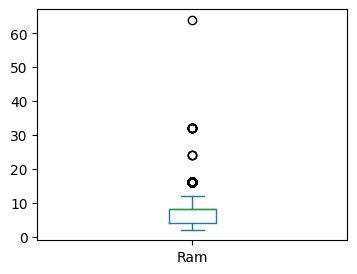

In [46]:
# 그래프 처리와 관련 된 실행 환경 변수 확인 #
# 이미지 크기 설정
plt.rcParams['figure.figsize'] = [4, 3]

df.Ram.plot(kind = 'box')

# 그래프 출력
plt.show()

Ram 컬럼의 IQR : 4.0
--------------------------------------------------------------------------------
Ram 컬럼의 정상 범위의 최소값 : -2.0
--------------------------------------------------------------------------------
Ram 컬럼의 정상 범위의 최대값 : 14.0
--------------------------------------------------------------------------------
Ram 컬럼의 이상치 인덱스 : 
Index([   3,    6,    8,   12,   17,   33,   41,   58,   60,   65,
       ...
       1227, 1229, 1230, 1232, 1238, 1242, 1244, 1246, 1255, 1270],
      dtype='int64', length=219)
--------------------------------------------------------------------------------


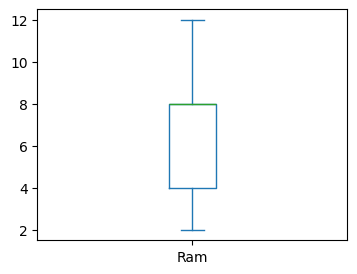

In [48]:
# Ram 컬럼 이상치 판단 --> IQR: IQR로 범위를 벗어난 것 제외
# IQR
Q1 = df.Ram.quantile(q = 0.25)
Q3 = df.Ram.quantile(q = 0.75)
IQR = Q3 - Q1

# 결과 확인하기
print(f'Ram 컬럼의 IQR : {IQR}')
print('-' * 80)

# 정상 범위의 최소 : min
min = Q1 - (IQR * 1.5) 

# 결과 확인하기
print(f'Ram 컬럼의 정상 범위의 최소값 : {min}')
print('-' * 80)

# 정상 범위의 최대 : max
max = Q3 + (IQR * 1.5)

# 결과 확인하기
print(f'Ram 컬럼의 정상 범위의 최대값 : {max}')
print('-' * 80)

# boolean 인덱싱을 통해서 14기가 초과의 행을 제거
# df.Ram > 14 조건을 만족하는 행 --> index 추출
ram_outlier_index = df.Ram.loc[df.Ram > 14].index

# 결과 확인하기
print(f'Ram 컬럼의 이상치 인덱스 : \n{ram_outlier_index}')
print('-' * 80)

# 이상치 제거
cleaned_ram = df.Ram.drop(index = ram_outlier_index)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_ram.plot(kind = 'box')

# 그래프 출력
plt.show()

### Weight: 이상치 제거

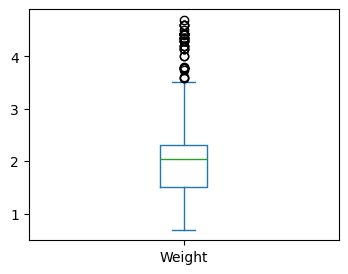

In [49]:
df.Weight.plot(kind = 'box')

# 그래프 출력
plt.show()

Weight 컬럼의 정상 범위의 최소값 : -2.0
--------------------------------------------------------------------------------
Weight 컬럼의 정상 범위의 최대값 : 14.0
--------------------------------------------------------------------------------
Weight 컬럼의 이상치 인덱스 : 
Index([ 177,  224,  238,  247,  251,  258,  424,  456,  468,  494,  530,  552,
        577,  578,  585,  586,  603,  650,  659,  723,  730,  758,  780,  781,
        788,  810,  818,  841,  901,  939,  955,  968,  972, 1047, 1048, 1061,
       1066, 1077, 1081, 1099, 1116, 1119, 1138, 1189, 1196, 1255],
      dtype='int64')
--------------------------------------------------------------------------------


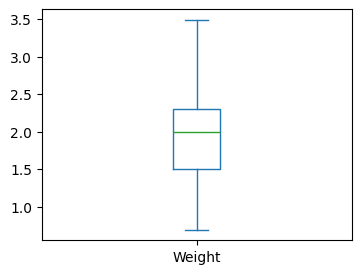

In [50]:
Q1 = df.Weight.quantile(q = 0.25)
Q3 = df.Weight.quantile(q = 0.75)

IQR = Q3 - Q1


# 정상 범위의 최소 : min
min = Q1 - (IQR * 1.5)

# 결과 확인하기
print(f'Weight 컬럼의 정상 범위의 최소값 : {min}')
print('-' * 80)

# 정상 범위의 최대 : max
max = Q3 + (IQR * 1.5)

# 결과 확인하기
print(f'Weight 컬럼의 정상 범위의 최대값 : {max}')
print('-' * 80)

# boolean 인덱싱을 통해서 3.5kg 초과의 행을 제거
# df.Weight > 3.5 조건을 만족하는 행 --> index 추출
weight_outlier_index = df.Weight.loc[df.Weight > 3.5].index

# 결과 확인하기
print(f'Weight 컬럼의 이상치 인덱스 : \n{weight_outlier_index}')
print('-' * 80)

# 이상치 제거
cleaned_weight = df.Weight.drop(index = weight_outlier_index)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_weight.plot(kind = 'box')

# 그래프 출력
plt.show()

### PPI: 이상치 제거

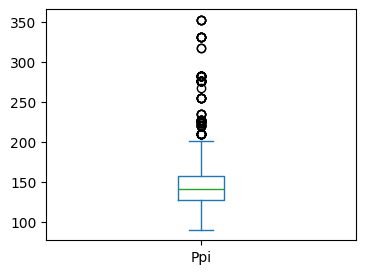

In [51]:
df.Ppi.plot(kind = 'box')

# 그래프 출력
plt.show()

Ppi 컬럼의 첫번째 IQR : 30.014837577504466
--------------------------------------------------------------------------------
Ppi 컬럼의 첫번째 정상 범위의 최소값 : 82.31341820497443
--------------------------------------------------------------------------------
Ppi 컬럼의 첫번째 정상 범위의 최대값 : 202.3727685149923
--------------------------------------------------------------------------------
Ppi 컬럼의 첫번재 이상치 인덱스 : 
Index([   0,    3,    4,    6,   12,   14,   15,   17,   33,   45,
       ...
       1165, 1180, 1188, 1192, 1202, 1209, 1225, 1235, 1248, 1270],
      dtype='int64', length=113)
--------------------------------------------------------------------------------


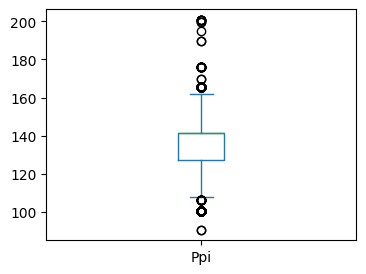

In [52]:
# Ppi 컬럼의 첫번째 이상치 판단 --> IQR #
# IQR
Q1 = df.Ppi.quantile(q = 0.25)
Q3 = df.Ppi.quantile(q = 0.75)
IQR = Q3 - Q1

# 결과 확인하기
print(f'Ppi 컬럼의 첫번째 IQR : {IQR}')
print('-' * 80)

# 정상 범위의 최소 : min
min = Q1 - (IQR * 1.5)

# 결과 확인하기
print(f'Ppi 컬럼의 첫번째 정상 범위의 최소값 : {min}')
print('-' * 80)

# 정상 범위의 최대 : max
max = Q3 + (IQR * 1.5)

# 결과 확인하기
print(f'Ppi 컬럼의 첫번째 정상 범위의 최대값 : {max}')
print('-' * 80)

# boolean 인덱싱을 통해서 202.37 초과의 행을 제거
# df.Ppi> 202.37조건을 만족하는 행 --> index 추출
ppi_outlier_index = df.Ppi.loc[df.Ppi > 202.37].index

# 결과 확인하기
print(f'Ppi 컬럼의 첫번재 이상치 인덱스 : \n{ppi_outlier_index}')
print('-' * 80)

# 이상치 제거
cleaned_ppi = df.Ppi.drop(index = ppi_outlier_index)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_ppi.plot(kind = 'box')

# 그래프 출력
plt.show()

Ppi 컬럼의 두번째 IQR : 13.876323510967495
--------------------------------------------------------------------------------
Ppi 컬럼의 두번째 정상 범위의 최소값 : 106.52118930477988
--------------------------------------------------------------------------------
Ppi 컬럼의 두번째 정상 범위의 최대값 : 162.02648334864986
--------------------------------------------------------------------------------
Ppi 컬럼의 두번째 정상 범위 최대값 보다 작은 이상치 인덱스 : 
Index([   5,   10,   22,   25,   36,   38,   42,   46,   49,   54,
       ...
       1250, 1253, 1254, 1256, 1261, 1262, 1263, 1266, 1268, 1272],
      dtype='int64', length=221)
--------------------------------------------------------------------------------
Ppi 컬럼의 두번째 정상 범위 최대값 보다 작은 이상치 인덱스 : 
Index([  19,   23,   53,   70,   71,   89,   92,   95,  103,  104,
       ...
       1120, 1121, 1142, 1146, 1193, 1222, 1229, 1238, 1240, 1260],
      dtype='int64', length=146)


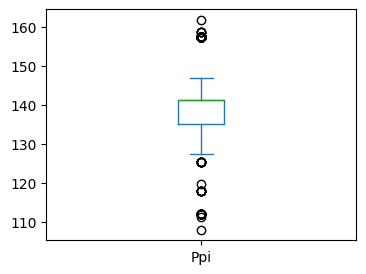

In [53]:
# Ppi 컬럼의 두번째 이상치 판단 --> IQR #
# IQR
Q1 = cleaned_ppi.quantile(q = 0.25)
Q3 = cleaned_ppi.quantile(q = 0.75)
IQR = Q3 - Q1

# 결과 확인하기
print(f'Ppi 컬럼의 두번째 IQR : {IQR}')
print('-' * 80)

# 정상 범위의 최소 : min
min = Q1 - (IQR * 1.5)

# 결과 확인하기
print(f'Ppi 컬럼의 두번째 정상 범위의 최소값 : {min}')
print('-' * 80)

# 정상 범위의 최대 : max
max = Q3 + (IQR * 1.5)

# 결과 확인하기
print(f'Ppi 컬럼의 두번째 정상 범위의 최대값 : {max}')
print('-' * 80)

# boolean 인덱싱을 통해서 106.521 미만, 162.026 초과의 행을 제거
# cleaned_ppi < 106.521 또는 cleaned_ppi > 162.026 조건을 만족하는 행 --> index 추출
ppi_outlier_index_low = cleaned_ppi.loc[cleaned_ppi < 106.521].index
ppi_outlier_index_high = cleaned_ppi.loc[cleaned_ppi > 162.026].index

# 결과 확인하기
print(f'Ppi 컬럼의 두번째 정상 범위 최대값 보다 작은 이상치 인덱스 : \n{ppi_outlier_index_low}')
print('-' * 80)
print(f'Ppi 컬럼의 두번째 정상 범위 최대값 보다 작은 이상치 인덱스 : \n{ppi_outlier_index_high}')

# 이상치 제거
cleaned_ppi = cleaned_ppi.drop(index = ppi_outlier_index_low)
cleaned_ppi.drop(index = ppi_outlier_index_high, inplace = True)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_ppi.plot(kind = 'box')

# 그래프 출력
plt.show()

Ppi 컬럼의 세번째 IQR : 6.11778688963571
--------------------------------------------------------------------------------
Ppi 컬럼의 세번째 정상 범위의 최소값 : 125.91753085810934
--------------------------------------------------------------------------------
Ppi 컬럼의 세번째 정상 범위의 최대값 : 150.38867841665217
--------------------------------------------------------------------------------
Ppi 컬럼의 세번째 정상 범위 최대값 보다 작은 이상치 인덱스 : 
Index([  31,   35,   67,   74,  113,  127,  177,  300,  317,  325,  346,  378,
        416,  475,  495,  503,  569,  571,  609,  620,  637,  641,  645,  690,
        721,  745,  748,  764,  765,  772,  774,  796,  805,  819,  821,  825,
        827,  838,  866,  882,  929,  949,  976,  984, 1003, 1005, 1009, 1014,
       1015, 1025, 1026, 1027, 1030, 1041, 1094, 1100, 1101, 1105, 1127, 1132,
       1168, 1245, 1271],
      dtype='int64')
--------------------------------------------------------------------------------
Ppi 컬럼의 세번째 정상 범위 최대값 보다 작은 이상치 인덱스 : 
Index([   8,    9,   61,   62,   

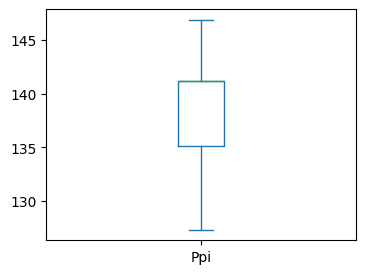

In [54]:
# Ppi 컬럼의 세번째 이상치 판단 --> IQR #
# IQR
Q1 = cleaned_ppi.quantile(q = 0.25)
Q3 = cleaned_ppi.quantile(q = 0.75)
IQR = Q3 - Q1

# 결과 확인하기
print(f'Ppi 컬럼의 세번째 IQR : {IQR}')
print('-' * 80)

# 정상 범위의 최소 : min
min = Q1 - (IQR * 1.5)

# 결과 확인하기
print(f'Ppi 컬럼의 세번째 정상 범위의 최소값 : {min}')
print('-' * 80)

# 정상 범위의 최대 : max
max = Q3 + (IQR * 1.5)

# 결과 확인하기
print(f'Ppi 컬럼의 세번째 정상 범위의 최대값 : {max}')
print('-' * 80)

# boolean 인덱싱을 통해서 125.917 미만, 150.388 초과의 행을 제거
# cleaned_ppi < 125.917 또는 cleaned_ppi > 150.388조건을 만족하는 행 --> index 추출
ppi_outlier_index_low = cleaned_ppi.loc[cleaned_ppi < 125.917].index
ppi_outlier_index_high = cleaned_ppi.loc[cleaned_ppi > 150.388].index

# 결과 확인하기
print(f'Ppi 컬럼의 세번째 정상 범위 최대값 보다 작은 이상치 인덱스 : \n{ppi_outlier_index_low}')
print('-' * 80)
print(f'Ppi 컬럼의 세번째 정상 범위 최대값 보다 작은 이상치 인덱스 : \n{ppi_outlier_index_high}')

# 이상치 제거
cleaned_ppi = cleaned_ppi.drop(index = ppi_outlier_index_low)
cleaned_ppi.drop(index = ppi_outlier_index_high, inplace = True)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_ppi.plot(kind = 'box')

# 그래프 출력
plt.show()

### HDD: 이상치 확인

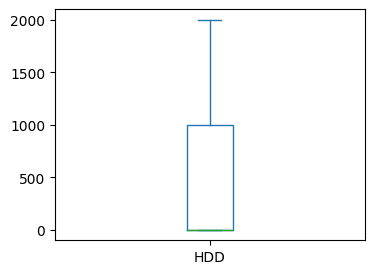

In [55]:
df.HDD.plot(kind = 'box')

# 그래프 출력
plt.show()

### SSD 이상치 제거

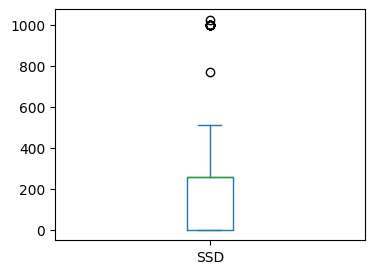

In [56]:
df.SSD.plot(kind = 'box')

# 그래프 출력
plt.show()

SSD 컬럼의 IQR : 256.0
--------------------------------------------------------------------------------
SSD 컬럼의 정상 범위의 최소값 : -384.0
--------------------------------------------------------------------------------
SSD 컬럼의 정상 범위의 최대값 : 640.0
--------------------------------------------------------------------------------
SSD 컬럼의 이상치 인덱스 : 
Index([ 190,  196,  266,  311,  316,  329,  347,  399,  497,  610,  639,  723,
        744,  780,  933, 1054, 1066, 1230],
      dtype='int64')
--------------------------------------------------------------------------------


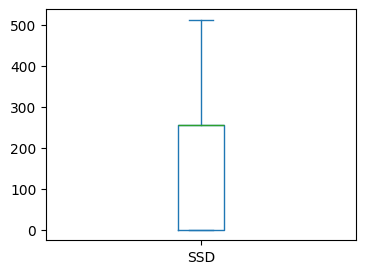

In [57]:
# SSD 컬럼 이상치 판단 --> IQR #
# IQR
Q1 = df.SSD.quantile(q = 0.25)
Q3 = df.SSD.quantile(q = 0.75)
IQR = Q3 - Q1

# 결과 확인하기
print(f'SSD 컬럼의 IQR : {IQR}')
print('-' * 80)

# 정상 범위의 최소 : min
min = Q1 - (IQR * 1.5)

# 결과 확인하기
print(f'SSD 컬럼의 정상 범위의 최소값 : {min}')
print('-' * 80)

# 정상 범위의 최대 : max
max = Q3 + (IQR * 1.5)

# 결과 확인하기
print(f'SSD 컬럼의 정상 범위의 최대값 : {max}')
print('-' * 80)

# boolean 인덱싱을 통해서 640GB 초과의 행을 제거
# df.SSD > 640 조건을 만족하는 행 --> index 추출
ssd_outlier_index = df.SSD.loc[df.SSD > 640].index

# 결과 확인하기
print(f'SSD 컬럼의 이상치 인덱스 : \n{ssd_outlier_index}')
print('-' * 80)

# 이상치 제거
cleaned_ssd = df.SSD.drop(index = ssd_outlier_index)

# 결과 확인하기 --> boxplot --> 이상치 확인
cleaned_ssd.plot(kind = 'box')

# 그래프 출력
plt.show()

### 이상치 제거후 데이터 병합

In [58]:
# 이상치 처리 후 남아 있는 데이터 확인하기 #
# Ram 컬럼
print(cleaned_ram)
print('-' * 80)

# Weight 컬럼
print(cleaned_weight)
print('-' * 80)

# Ppi 컬럼
print(cleaned_ppi)
print('-' * 80)

# SSD 컬럼
print(cleaned_ssd)
print('-' * 80)

0       8
1       8
2       8
4       8
5       4
       ..
1267    2
1268    4
1269    4
1271    2
1272    6
Name: Ram, Length: 1054, dtype: int64
--------------------------------------------------------------------------------
0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1268    2.20
1269    1.80
1270    1.30
1271    1.50
1272    2.19
Name: Weight, Length: 1227, dtype: float64
--------------------------------------------------------------------------------
1       127.677940
2       141.211998
7       127.677940
11      141.211998
13      141.211998
           ...    
1257    141.211998
1258    141.211998
1264    141.211998
1265    141.211998
1267    135.094211
Name: Ppi, Length: 594, dtype: float64
--------------------------------------------------------------------------------
0       128
1         0
2       256
3       512
4       256
       ... 
1268      0
1269    128
1270    512
1271      0
1272      0
Name: SSD, Length: 1255, dtype: int64
-----

In [59]:
# 각 컬럼 병합 --> pd.concat([Series1, ...]), axis = 1, join = 'inner(교집합)') #
df = pd.concat([cleaned_ram, cleaned_weight, df.Price, df.TouchScreen, df.Ips, cleaned_ppi, df.Cpu_brand, df.HDD, cleaned_ssd, df.Gpu_brand, df.Os],
              axis = 1, join = 'inner')

# 결과 확인하기
print(f'교집합 : \n{df}')

교집합 : 
      Ram  Weight      Price  TouchScreen  Ips         Ppi  \
1       8    1.34  10.776777            0    0  127.677940   
2       8    1.86  10.329931            0    0  141.211998   
7       8    1.34  11.030615            0    0  127.677940   
11      4    1.86   9.819076            0    0  141.211998   
13      4    2.20  10.187967            0    0  141.211998   
...   ...     ...        ...          ...  ...         ...   
1257    8    2.32  10.772385            0    0  141.211998   
1258    8    2.40  11.089517            0    0  141.211998   
1264    8    2.60  10.776844            0    1  141.211998   
1265    6    2.04  10.285461            0    0  141.211998   
1267    2    1.17   9.317895            0    0  135.094211   

                  Cpu_brand   HDD  SSD Gpu_brand       Os  
1             Intel Core i5     0    0     Intel      Mac  
2             Intel Core i5     0  256     Intel   Others  
7             Intel Core i5     0    0     Intel      Mac  
11      

In [60]:
# 병합한 DataFrame --> index --> reset_index(drop = True, inplace = True) #
df.reset_index(drop = True, inplace = True)

# 결과 확인하기
print(df)

     Ram  Weight      Price  TouchScreen  Ips         Ppi  \
0      8    1.34  10.776777            0    0  127.677940   
1      8    1.86  10.329931            0    0  141.211998   
2      8    1.34  11.030615            0    0  127.677940   
3      4    1.86   9.819076            0    0  141.211998   
4      4    2.20  10.187967            0    0  141.211998   
..   ...     ...        ...          ...  ...         ...   
449    8    2.32  10.772385            0    0  141.211998   
450    8    2.40  11.089517            0    0  141.211998   
451    8    2.60  10.776844            0    1  141.211998   
452    6    2.04  10.285461            0    0  141.211998   
453    2    1.17   9.317895            0    0  135.094211   

                 Cpu_brand   HDD  SSD Gpu_brand       Os  
0            Intel Core i5     0    0     Intel      Mac  
1            Intel Core i5     0  256     Intel   Others  
2            Intel Core i5     0    0     Intel      Mac  
3            Intel Core i3   50

### Feature Engineering
숫자가 아닌 속성들을 분석이 용이하게 수정

### Label Encoding: CPU / GPU / OS

In [61]:
# 각 컬럼별 values 확인 #
# Cpu_brand 컬럼
print(f'Cpu_brand 컬럼의 항목 : \n{np.unique(df.Cpu_brand)}')
print('-' * 80)

# Gpu_brand 컬럼
print(f'Gpu_brand 컬럼의 항목 : \n{np.unique(df.Gpu_brand)}')
print('-' * 80)

# Os 컬럼
print(f'Os 컬럼의 항목 : \n{np.unique(df.Os)}')

Cpu_brand 컬럼의 항목 : 
['AMD Processor' 'Intel Core i3' 'Intel Core i5' 'Intel Core i7'
 'Other Intel Processor']
--------------------------------------------------------------------------------
Gpu_brand 컬럼의 항목 : 
['AMD' 'Intel' 'Nvidia']
--------------------------------------------------------------------------------
Os 컬럼의 항목 : 
['Mac' 'Others' 'Windows']


In [62]:
# 이상치 제거(o) --> replace() 함수 사용 #
df.replace({'AMD Processor':0, 'Intel Core i3':1, 'Intel Core i5':2, 'Intel Core i7':3, 'Other Intel Processor':4,
            'AMD':0, 'Intel':1, 'Nvidia':2,
            'Mac':0, 'Others':1, 'Windows':2}, inplace = True)

# 결과 확인하기
print(df)

     Ram  Weight      Price  TouchScreen  Ips         Ppi  Cpu_brand   HDD  \
0      8    1.34  10.776777            0    0  127.677940          2     0   
1      8    1.86  10.329931            0    0  141.211998          2     0   
2      8    1.34  11.030615            0    0  127.677940          2     0   
3      4    1.86   9.819076            0    0  141.211998          1   500   
4      4    2.20  10.187967            0    0  141.211998          1     0   
..   ...     ...        ...          ...  ...         ...        ...   ...   
449    8    2.32  10.772385            0    0  141.211998          3     0   
450    8    2.40  11.089517            0    0  141.211998          3  1000   
451    8    2.60  10.776844            0    1  141.211998          3  1000   
452    6    2.04  10.285461            0    0  141.211998          0     0   
453    2    1.17   9.317895            0    0  135.094211          4     0   

     SSD  Gpu_brand  Os  
0      0          1   0  
1    256   

C:\Users\USER\AppData\Local\Temp\ipykernel_6960\3566789295.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'AMD Processor':0, 'Intel Core i3':1, 'Intel Core i5':2, 'Intel Core i7':3, 'Other Intel Processor':4,


### Train-set과 Test-set 설정

In [63]:
# 필요한 함수 임폴트
from sklearn.model_selection import train_test_split

# X_data 생성
X_data = df.drop(columns = ['Price'])

# y_data 생성
y_data = df.Price

# train_test_split() 함수 적용
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, random_state = 34)

In [64]:
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-' * 80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-' * 80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-' * 80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (340, 10)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (340,)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (114, 10)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (114,)


### 모델 학습 및 평가

#### Linear Regression

In [66]:
# 필요한 함수 임폴트 #
from sklearn.linear_model import LinearRegression

# 모델 생성 함수 호출, 모델 생성
lr = LinearRegression()

# 모델 학습 #
lr.fit(X_train, y_train)

LinearRegression()

In [67]:
# 평가용 데이터를 이용한 예측 #
pred_test = lr.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error

# 평가용 데이터에 대한 성능 평가
mse_lr = mean_squared_error(y_test, pred_test)

# 결과 확인하기
print(f'이상치 제거 후 데이터에 대한 성능 평가 결과 : {mse_lr}')

이상치 제거 후 데이터에 대한 성능 평가 결과 : 0.11750906173823332


In [69]:
# coef_, intercept_ 추출 및 시각화 #
coef = lr.coef_
intercept = lr.intercept_

# 결과 확인하기
print(coef)
print('-' * 80)
print(intercept)
print('-' * 80)

# Series 자료형 생성: 가중치 비교를 위한 저장
lr_index = X_train.columns
coefs_series = pd.Series(data = coef, index = lr_index) 

# 결과 확인하기
print(f'선형 회귀 모델의 가중치 : \n{coefs_series}')
print('-' * 80)
print(f'선형 회귀 모델의 절편(bias)값 : {intercept}')

[ 9.78534689e-02  2.07395114e-01 -1.39328286e-01  9.65531945e-02
 -4.01789955e-03  5.92407793e-02  4.69271756e-05  1.01302292e-03
  5.96447984e-02  1.33671558e-01]
--------------------------------------------------------------------------------
9.487763908224725
--------------------------------------------------------------------------------
선형 회귀 모델의 가중치 : 
Ram            0.097853
Weight         0.207395
TouchScreen   -0.139328
Ips            0.096553
Ppi           -0.004018
Cpu_brand      0.059241
HDD            0.000047
SSD            0.001013
Gpu_brand      0.059645
Os             0.133672
dtype: float64
--------------------------------------------------------------------------------
선형 회귀 모델의 절편(bias)값 : 9.487763908224725


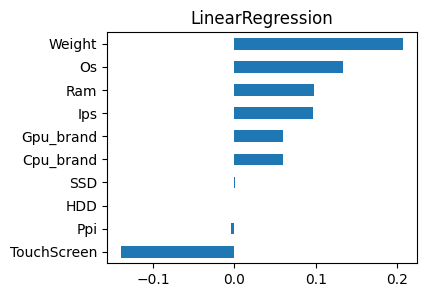

In [70]:
# Series 자료형 --> 정렬 --> sort_values + 시각화 #
coefs_series.sort_values().plot(kind = 'barh') # 선형회귀 모델의 계수들
plt.title('LinearRegression')

# 그래프 출력
plt.show()

#### RandomForest
Grisd Search CV